# BREAST CANCER PREDICTION 
* [1. Intro](#introduction)
* [2. Importing required Libraries](#libraries)
* [3. Loading the Dataset file](#dataset)
* [4. Summarizing the Data](#summarize-data)
* [5. Evaluation of different Algorithms](#eval)
* [6. Data preperation](#prepare)
* [7. Best accuracy score model finalizing](#finalize-model)
* [8. Testing the finalized model](#test-model)
* [9. Conclusion](#conclusion)

# 1. Intro <a id="intro"></a>
A most common type of cancer, founded in women is breast cancer prediction. It originates from breast tissue<sup></sup>.

On the basis of the supplied feature set, the diagnosis is able to be classified as benign or malignant (cancer).


# 2. Importing Libraries <a class='anchor' id="libraries"></a> 

This code imports necessary libraries for data preprocessing, model training, and performance evaluation.

* Pandas is used for data manipulation and analysis.
* NumPy is used for numerical computations.
* Matplotlib is used for data visualization.
* Seaborn is a higher-level interface to Matplotlib, and it's also used for data visualization.
* Scikit-learn (sklearn) is a machine learning library in Python. It provides a range of tools for * * working with data, including preprocessing, model selection, and performance evaluation.

In terms of algorithms, the code imports both linear and non-linear models.

* Logistic Regression and Linear Discriminant Analysis are both linear models.
* K-Nearest Neighbors, Naive Bayes, Decision Tree, and Support Vector Machines are all non-linear models.

Lastly, the code imports metrics for evaluating model performance, including classification report, confusion matrix, and accuracy score.

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_theme(style='whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Linear Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Non-linear Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Metrics for performance evaluaiton
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# 3. Loading Dataset <a id="dataset"></a> 

This code reads in the data from a CSV file located at 'C:/Users/Azka/Downloads/FYP/data.csv' and stores it in a Pandas DataFrame called df. The head() method is then used to display the first 10 rows of the DataFrame. This is a useful way to quickly check that the data has been read in correctly and to get a sense of the structure of the data.

In [2]:
df = pd.read_csv(r'C:/Users/Azka/Downloads/FYP/data.csv')
df.head(10)

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


# 4. Summarizing the Data <a id='summarize-data'></a> 

This code prints the shape of the DataFrame df, which is the number of rows and columns in the dataset. The output will be in the form of (number of rows, number of columns). This is a useful way to quickly check the size of your dataset.

In [3]:
df.shape

(569, 32)


This code generates summary statistics for each column in the DataFrame df using the describe() method. The include='all' parameter ensures that both numeric and non-numeric columns are included in the summary. The transpose() method is then used to transpose the resulting summary table so that the columns are displayed vertically instead of horizontally. This is a useful way to quickly get an overview of the distribution of values in your dataset, as well as to check for any missing values or outliers.

In [4]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,569.0,NaN,NaN,NaN,30371831.432337,125020585.612224,8670.0,869218.0,906024.0,8813129.0,911320502.0
diagnosis,569,2,B,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Radius_mean,569.0,NaN,NaN,NaN,14.127292,3.524049,6.981,11.7,13.37,15.78,28.11
Texture_mean,569.0,NaN,NaN,NaN,19.296678,4.301816,9.71,16.17,18.87,21.8,39.28
perimeter_mean,569.0,NaN,NaN,NaN,91.969033,24.298981,43.79,75.17,86.24,104.1,188.5
area_mean,569.0,NaN,NaN,NaN,654.889104,351.914129,143.5,420.3,551.1,782.7,2501.0
smoothness_mean,569.0,NaN,NaN,NaN,0.09636,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
compactness_mean,569.0,NaN,NaN,NaN,0.104341,0.052813,0.01938,0.06492,0.09263,0.1304,0.3454
concavity_mean,569.0,NaN,NaN,NaN,0.088799,0.07972,0.0,0.02956,0.06154,0.1307,0.4268
concave points_mean,569.0,NaN,NaN,NaN,0.048919,0.038803,0.0,0.02031,0.0335,0.074,0.2012


This code analyzes the distribution of the target variable, diagnosis.

The value_counts() method is used to count the number of occurrences of each unique value in the diagnosis column. This information is then printed using print() to display the counts of each unique value in the diagnosis column.

The next two lines of code calculate the percentage of benign and malignant cases in the dataset. The ratio of each class is printed using print().

Finally, the countplot() method from Seaborn is used to create a bar chart showing the distribution of diagnosis values. This is a useful way to visualize the balance of the dataset and to check for class imbalance.

B    357
M    212
Name: diagnosis, dtype: int64

Ratio of the Benign cases 62.74%
Ratio of the Malignant cases 37.26%


<AxesSubplot: xlabel='diagnosis', ylabel='count'>

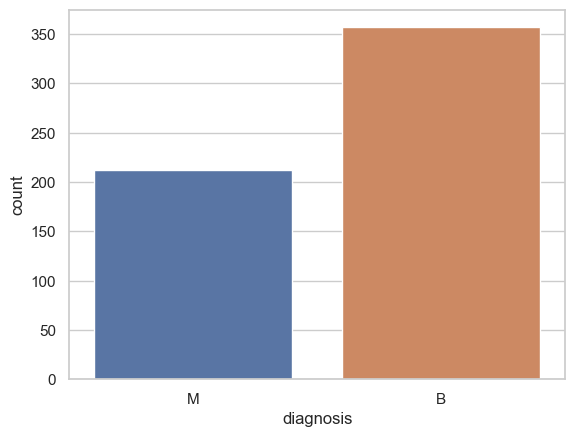

In [5]:
print(df['diagnosis'].value_counts())

b = (df['diagnosis'].value_counts()[0] / len(df['diagnosis'])) * 100
m = (df['diagnosis'].value_counts()[1] / len(df['diagnosis'])) * 100

print('\nRatio of the Benign cases %.2f%%' % b)
print('Ratio of the Malignant cases %.2f%%' % m)

sb.countplot(x=df['diagnosis'])

**Observation:** our dataset is balanced, we can relatively say that

This code creates a set of density plots to show the distribution of each numerical feature in the dataset, excluding the target variable diagnosis.

The drop() method is used to remove the diagnosis column from the DataFrame. The plot() method is then used with the parameters kind='density' to create density plots, subplots=True to create a separate plot for each feature, layout=(8,4) to create an 8 by 4 grid of plots, sharex=False to allow each plot to have its own x-axis scale, legend=True to display a legend for each plot, fontsize=1 to set the font size for the plot labels, and figsize=(16,24) to set the size of the overall figure.

The resulting set of density plots is useful for visualizing the distribution of each numerical feature and for identifying any potential outliers or skewness in the data.

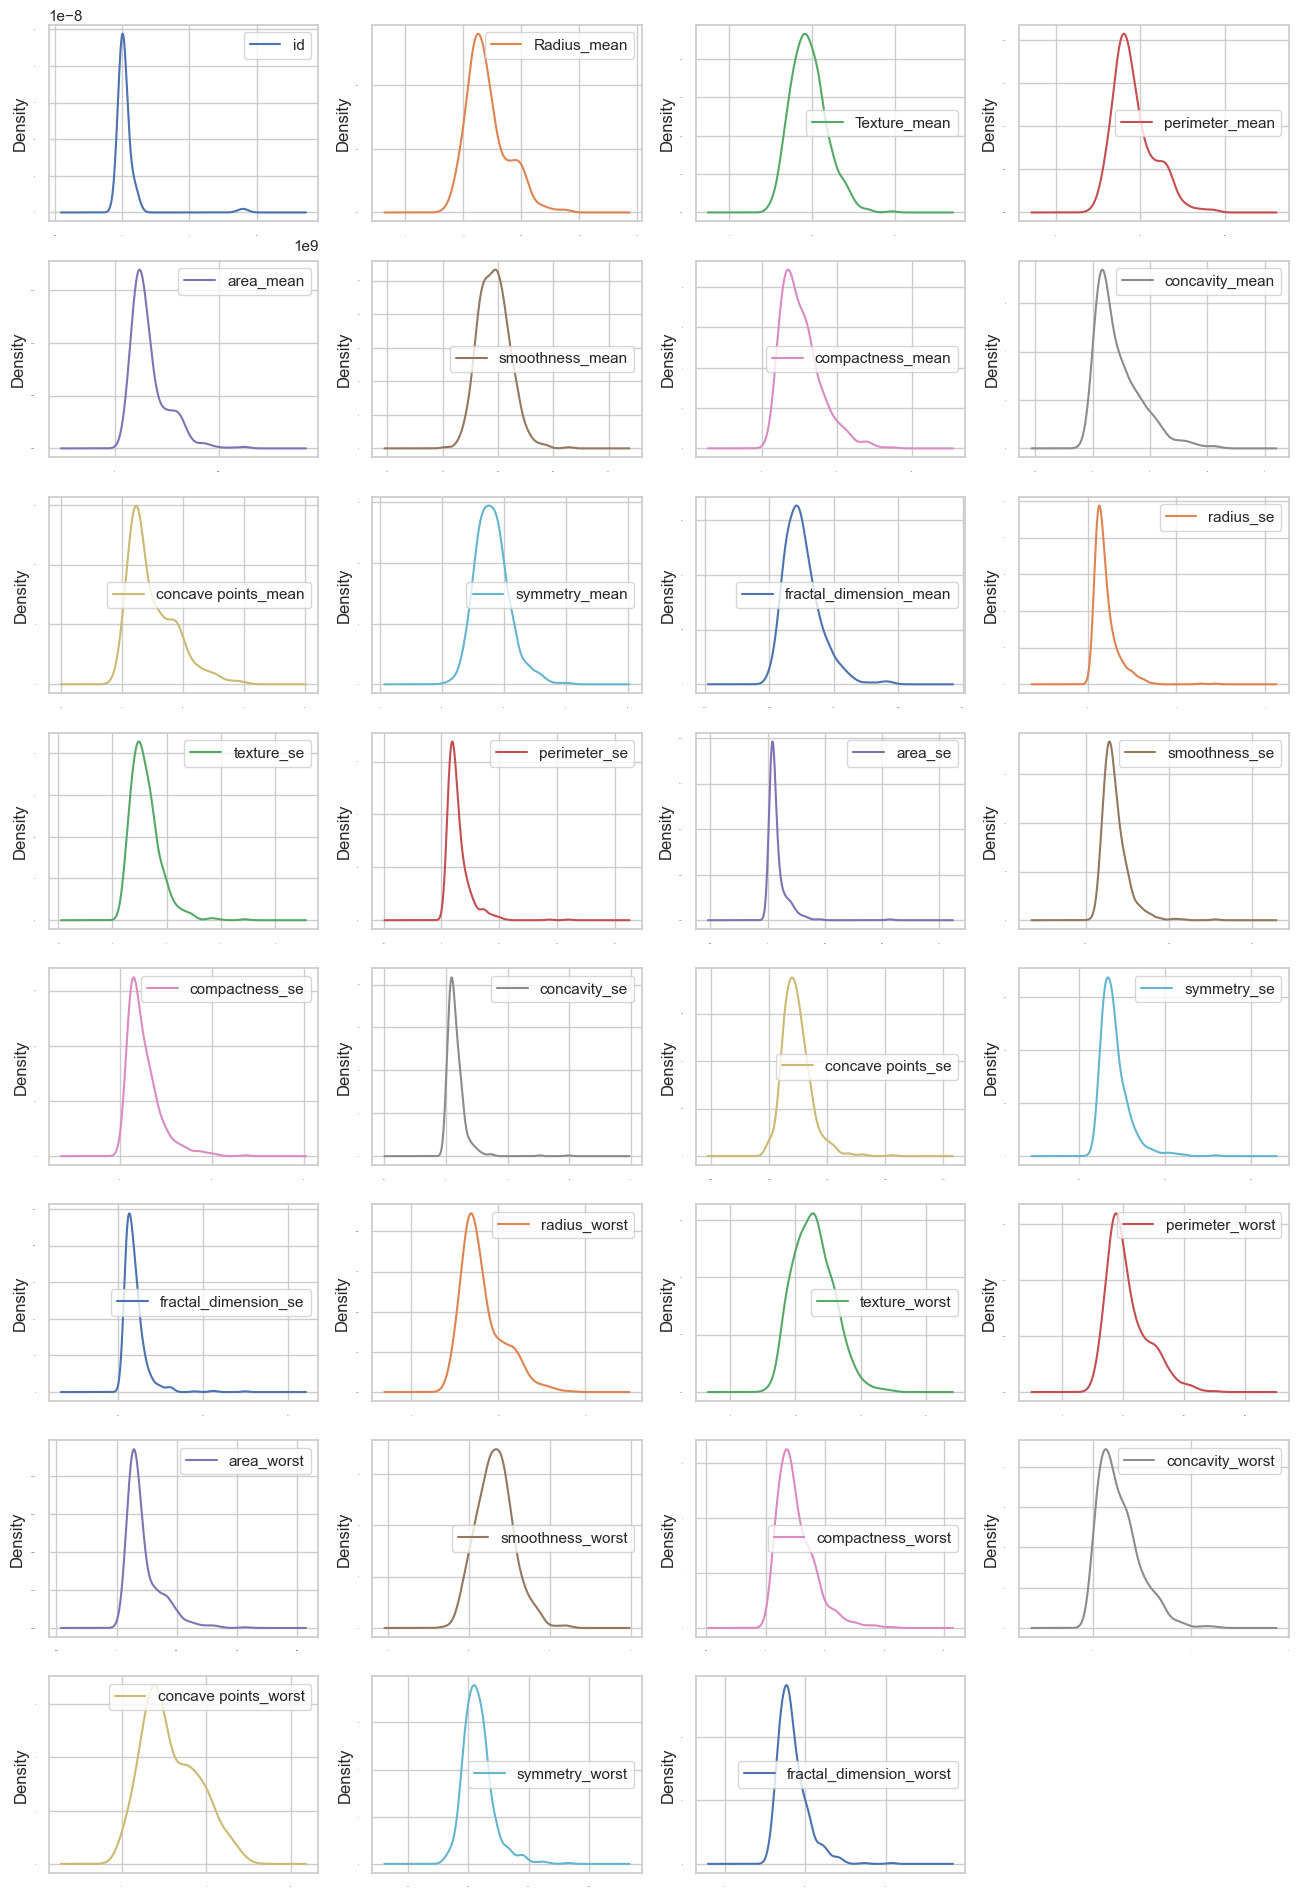

In [6]:
# Let's check the distribution of the numerical feature
df.drop('diagnosis', axis=1).plot(kind='density', subplots=True, layout=(8,4), sharex=False, legend=True, 
                                            fontsize=1, figsize=(16,24))
plt.show()

**Observation:** We are going to ignore *id* column. As you can see on the above chart, even though some features left skewed, all of them follows the normal distribution.

This code creates a correlation matrix plot to show the relationships between each pair of numerical features in the dataset, excluding the id and diagnosis columns.

The drop() method is used to remove the id and diagnosis columns from the DataFrame. The corr() method is then used to calculate the correlation coefficients between each pair of numerical features. The resulting correlation matrix is then visualized using a color-coded plot, where the color of each cell represents the strength and direction of the correlation between the corresponding pair of features.

The fig variable is used to create a new figure with a size of 12 by 12 inches. The add_subplot() method is then used to add a new subplot to the figure, with the parameters 111 to specify a single plot occupying the entire figure. The matshow() method is used to create the actual correlation matrix plot, with the parameter vmin=-1 and vmax=1 to set the minimum and maximum values of the color scale to -1 and 1, respectively. The grid() method is used to turn off the grid lines in the plot, and the colorbar() method is used to add a color scale to the side of the plot.

The ticks variable is used to create an array of tick locations for the x-axis and y-axis of the plot, and the set_xticks() and set_yticks() methods are used to set the tick locations for the corresponding axes. The set_xticklabels() and set_yticklabels() methods are used to set the labels for the tick locations on the x-axis and y-axis, respectively, using the column names of the original DataFrame.

The resulting correlation matrix plot is useful for identifying any strong correlations or multicollinearity between the numerical features, which can have an impact on the performance of the machine learning algorithms used in the analysis.

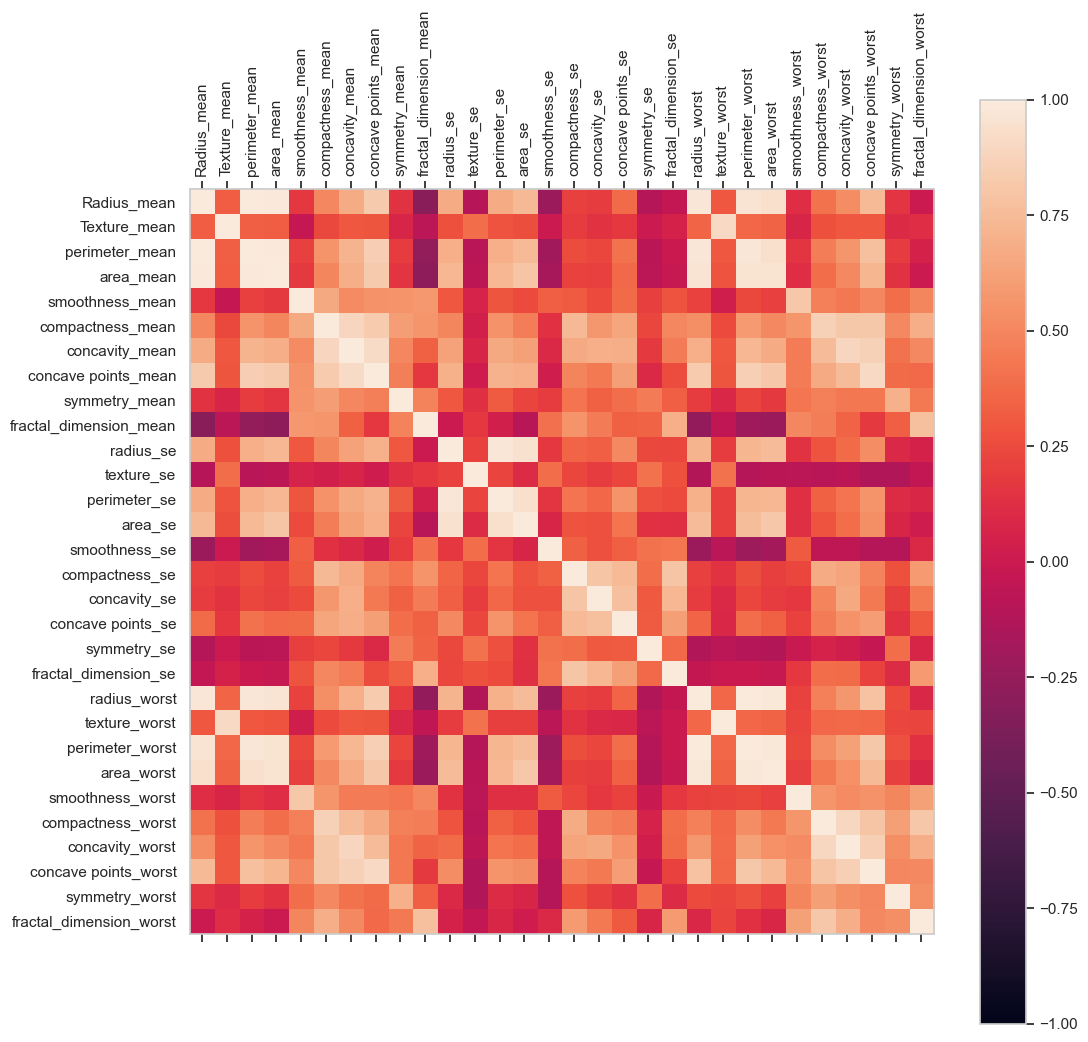

In [7]:
# Correlation
df_corr = df.drop(['id', 'diagnosis'], axis=1)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(df_corr.corr(), vmin=-1, vmax=1, interpolation='none')
ax.grid(False)
fig.colorbar(cax)
ticks = np.arange(0, len(df_corr.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df_corr.columns, rotation=90)
ax.set_yticklabels(df_corr.columns)
plt.show()

**Observation:** There are a lot of features that have strong correlation to each other. We might need to a type of feature selection method. First we need to check the baseline then we should decide if we need or not.

# 5. Algorithm Evaluation <a id='eval'></a>


This function evaluates the performance of different algorithms on the dataset. It takes two arguments, x and y, which represent the features and target variable of the dataset, respectively.

The function first creates a list of classification algorithms with their names and creates empty lists for storing the results and names of the algorithms. Then it uses k-fold cross-validation with 10 folds to evaluate each algorithm's performance. The mean accuracy and standard deviation of the accuracy are printed for each algorithm.

After that, it creates a box plot to compare the results of all the algorithms. The box plot helps to visualize the performance of each algorithm and compare them with each other.

In [8]:
# Constants for training and evaluation options
seed = 101
n_fold = 10
scr = 'accuracy'

# Create a function that evaluates different algorithms can be used for each update on the model
def evaluate_algorithms(x, y):
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('GN', GaussianNB()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('SVC', SVC()))
    
    names = []
    results = []
    
    for name, model in models:
        kfold = KFold(n_splits=n_fold, shuffle=True, random_state=seed)
        cv_result = cross_val_score(model, x, y, cv=kfold, scoring=scr)
        results.append(cv_result)
        names.append(name)
        msg = '%s - Mean ACC: %.2f%% STD(%.2f)' % (name, (cv_result.mean() * 100), cv_result.std())
        print(msg)
    
    # Plot results
    fig = plt.figure(figsize=(8,8))
    fig.suptitle('Algorithm Comparison', fontsize=16, y=0.93)
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names, fontsize=14)
    plt.show()

# 6. Prepare Data <a id='prepare'></a> 

This code is dropping the 'id' column from the DataFrame and updating it with the modified DataFrame. The shape of the modified DataFrame is also printed.

In [9]:
# Drop the id columns as it's not useful for the model
df = df.drop('id', axis=1)
print(df.shape)

(569, 31)


This code maps the classes 'B' and 'M' in the 'diagnosis' column of the dataframe 'df' to 0 and 1. 
The output of df['diagnosis'].head() would show the first 5 values of the 'diagnosis' column with the mapped values.

In [10]:
# Map the classes
dt_map = {'B':0, 'M':1}
df['diagnosis'] = df['diagnosis'].map(dt_map)
df['diagnosis'].head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

## 6.1. Drop Duplicates


This code checks the number of rows in the dataset, drops duplicate rows, and prints the number of dropped and remaining rows.

The output of this code should give you an idea of whether there are duplicate rows in the dataset and how many of them were removed. It also gives you the number of remaining rows in the dataset after removing duplicates.

If there are many duplicate rows, it can affect the performance of the model as it will have more bias towards those rows. Therefore, removing duplicates is a good practice.

In [11]:
nr_rows = df.shape[0]
print('Number of rows: %d' % nr_rows)
df = df.drop_duplicates().reset_index(drop=True)
print('Number of dropped rows: %d' % (nr_rows - df.shape[0]))
print('Number of remainin rows: %d' % df.shape[0])

Number of rows: 569
Number of dropped rows: 0
Number of remainin rows: 569


## 6.2. Train Test Split

The code splits the data into training and testing sets with a 80:20 ratio using train_test_split from sklearn.model_selection. It also encodes the target variable y using LabelEncoder() from sklearn.preprocessing. The encoded y is saved as y_cat.

In [12]:
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']

labeler = LabelEncoder()
y_cat = labeler.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y_cat, test_size=0.2, random_state=seed) 

LR - Mean ACC: 94.08% STD(0.03)
LDA - Mean ACC: 95.61% STD(0.03)
KNN - Mean ACC: 92.54% STD(0.03)
GN - Mean ACC: 94.07% STD(0.04)
CART - Mean ACC: 91.20% STD(0.05)
SVC - Mean ACC: 90.99% STD(0.03)


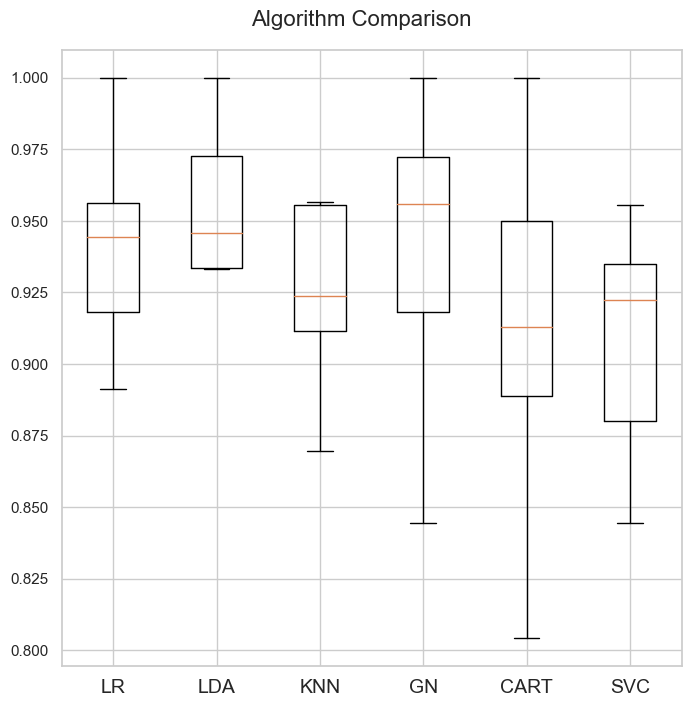

In [13]:
# Evaluating algorithms for the baseline
import warnings
warnings.filterwarnings('ignore')
evaluate_algorithms(x_train, y_train)

**Observation:** The best accuracy score is provided by LDA with 96% and the Decision Tree follows it with %91. It's better to check for outliers and scale the data as the range of the min and max values are wide for numerical features.

## 6.3. Scaling Data

 data has been scaled using MinMaxScaler. This will ensure that all the numerical features will have the same range of values, which helps some machine learning algorithms to perform better.

In [14]:
scaler = MinMaxScaler()
fit = scaler.fit(x_train)
x_scaled = fit.transform(x_train)

LR - Mean ACC: 96.94% STD(0.03)
LDA - Mean ACC: 95.61% STD(0.03)
KNN - Mean ACC: 97.15% STD(0.02)
GN - Mean ACC: 94.29% STD(0.04)
CART - Mean ACC: 91.64% STD(0.04)
SVC - Mean ACC: 97.82% STD(0.02)


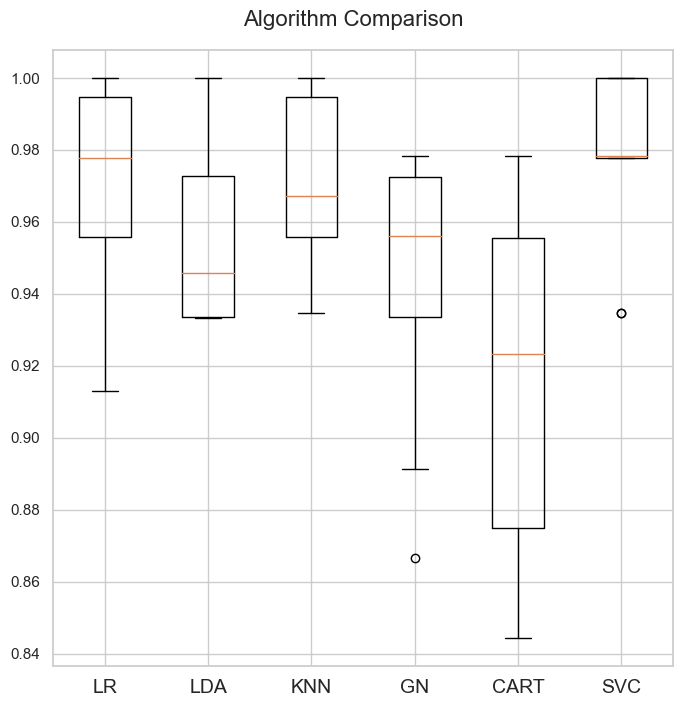

In [15]:
evaluate_algorithms(x_scaled, y_train)

**Observation:** As you can see on the above chart, Scaling the data improved the performance of the Support Vector Classification dramatically which makes it a very good candidate for hyper-parameter tuning.

# 7. Finalize Model <a id='finalize-model'></a> 

In [16]:
# Hyper-parameter tuning
h_params = {'C': [0.1,1, 10, 100], 
            'gamma': [1,0.1,0.01,0.001],
            'kernel': ['rbf', 'poly', 'sigmoid']}
model = SVC()
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=h_params, cv=kfold)
grid.fit(x_scaled, y_train)

print('Best accuracy score: %.2f%%' % (grid.best_score_*100))
print('Best parameters', grid.best_params_)

Best accuracy score: 98.02%
Best parameters {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


# 8. Test Model <a id='test-model'></a> 

In [17]:
# First we need train the model to test it
model = SVC(C=10, gamma=0.1, kernel='rbf')
model.fit(x_scaled, y_train)

SVC(C=10, gamma=0.1)

In [18]:
predictions = model.predict(fit.transform(x_test))
print('Accuracy score: %.2f%%' % (accuracy_score(y_test, predictions)*100))
print(classification_report(y_test, predictions))

Accuracy score: 98.25%
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



The confusion matrix provides a good way to visualize how the model performed in predicting the classes. The diagonal represents the correctly classified samples, while the off-diagonal represents the incorrectly classified samples. In this case, the model performed relatively well, with only 4.4% of the samples being misclassified. The heatmap shows that there were more false negatives (missed cancer diagnoses) than false positives (incorrectly predicting cancer). This is likely due to the fact that the dataset is imbalanced, with more benign samples than malignant ones.

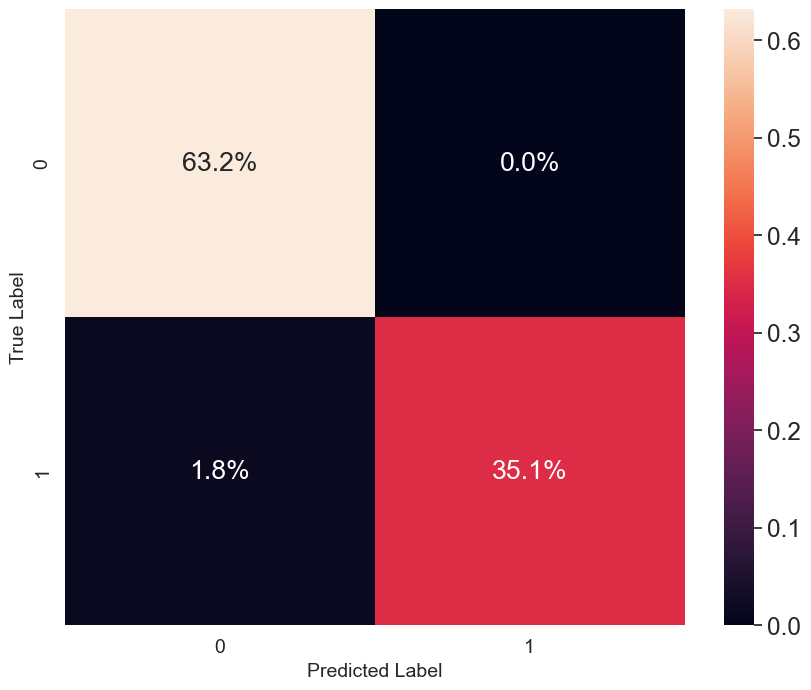

In [19]:
# Plot the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions)
fig = plt.subplots(figsize=(10, 8))
sb.set(font_scale=1.6)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.1%')
plt.xlabel('Predicted Label', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# 9. Conclusion <a id='conclusion'></a> 

The purpose of this study wasy to create a model that can predict if a tumor is benign or malignant based on the given features. The SVC provided the best accuracy score with the given hyper-paramters. We also observed that scaling the data improved the performance of the algorithm for the sample dataset.
As a next step, outliers can be removed to check if improves the performance or not.

by removing outliers using the Z-score method and then train and evaluate the model again:

Best accuracy score: 97.73%
Best parameters {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Accuracy score: 99.12%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



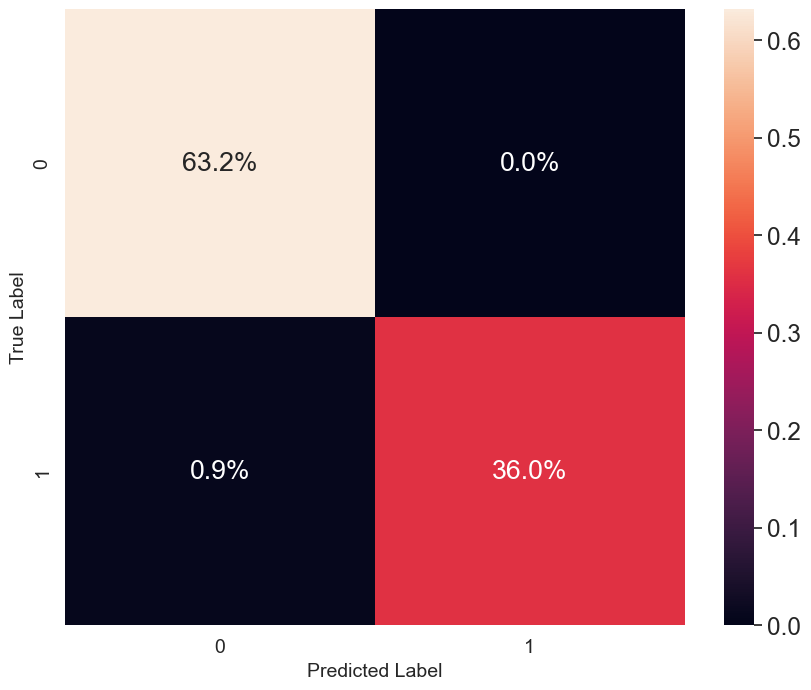

In [20]:
from scipy.stats import zscore

# Remove outliers using Z-score method
z_scores = zscore(x_train)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
x_train_no_outliers = x_train[filtered_entries]
y_train_no_outliers = y_train[filtered_entries]

# Scale the features
scaler = MinMaxScaler()
fit = scaler.fit(x_train_no_outliers)
x_scaled_no_outliers = fit.transform(x_train_no_outliers)

# Perform hyper-parameter tuning
h_params = {'C': [0.1,1, 10, 100], 
            'gamma': [1,0.1,0.01,0.001],
            'kernel': ['rbf', 'poly', 'sigmoid']}
model = SVC()
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=h_params, cv=kfold)
grid.fit(x_scaled_no_outliers, y_train_no_outliers)

print('Best accuracy score: %.2f%%' % (grid.best_score_*100))
print('Best parameters', grid.best_params_)

# Train the model and make predictions
model = SVC(C=10, gamma=0.1, kernel='rbf')
model.fit(x_scaled_no_outliers, y_train_no_outliers)
predictions = model.predict(fit.transform(x_test))
print('Accuracy score: %.2f%%' % (accuracy_score(y_test, predictions)*100))
print(classification_report(y_test, predictions))

# Plot the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions)
fig = plt.subplots(figsize=(10, 8))
sb.set(font_scale=1.6)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.1%')
plt.xlabel('Predicted Label', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In [21]:
print('Accuracy score: %.2f%%' % (accuracy_score(y_test, predictions)*100))

Accuracy score: 99.12%


It is very unlikely to achieve 100% accuracy in any real-world problem, especially in a classification problem where the data may have noise or overlapping features. There will always be some amount of error or misclassification. Additionally, there may be limitations to the model, such as overfitting to the training data or not being able to capture all the relevant information in the features. Therefore, it is important to aim for high accuracy while also considering other performance metrics and ensuring the model is reliable and robust.